In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("preCrop_recommendation.csv")

In [3]:
dataset

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label,label.1
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice
...,...,...,...,...,...,...,...,...,...,...
2195,2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,coffee
2196,2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,coffee
2197,2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,coffee
2198,2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,coffee


In [4]:
dataset.isnull()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label,label.1
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False,False,False


In [5]:
dataset = dataset.drop(['label','label.1'],axis=1)

In [6]:
dataset.isnull().sum()

Unnamed: 0     0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [7]:
dataset.cov()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
Unnamed: 0,403516.666667,6635.809459,-3511.688040,4615.582992,577.525744,7412.954082,26.218499,4224.477255
N,6635.809459,1362.889537,-281.860096,-262.727147,4.954622,156.730700,2.762395,119.747146
P,-3511.688040,-281.860096,1088.068460,1229.998647,-21.303478,-87.197323,-3.523487,-115.730685
K,4615.582992,-262.727147,1229.998647,2565.212869,-41.134229,215.215502,-6.644240,-148.811212
temperature,577.525744,4.954622,-21.303478,-41.134229,25.641550,23.147400,-0.069739,-8.372180
humidity,7412.954082,156.730700,-87.197323,215.215502,23.147400,495.677307,-0.146161,115.534462
ph,26.218499,2.762395,-3.523487,-6.644240,-0.069739,-0.146161,0.598980,-4.639202
rainfall,4224.477255,119.747146,-115.730685,-148.811212,-8.372180,115.534462,-4.639202,3020.424469


In [8]:
dataset.corr()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall
Unnamed: 0,1.000000,0.282965,-0.167593,0.143461,0.179543,0.524157,0.053330,0.121006
N,0.282965,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.167593,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,0.143461,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.179543,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.524157,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.053330,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.121006,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [9]:
import seaborn as sns

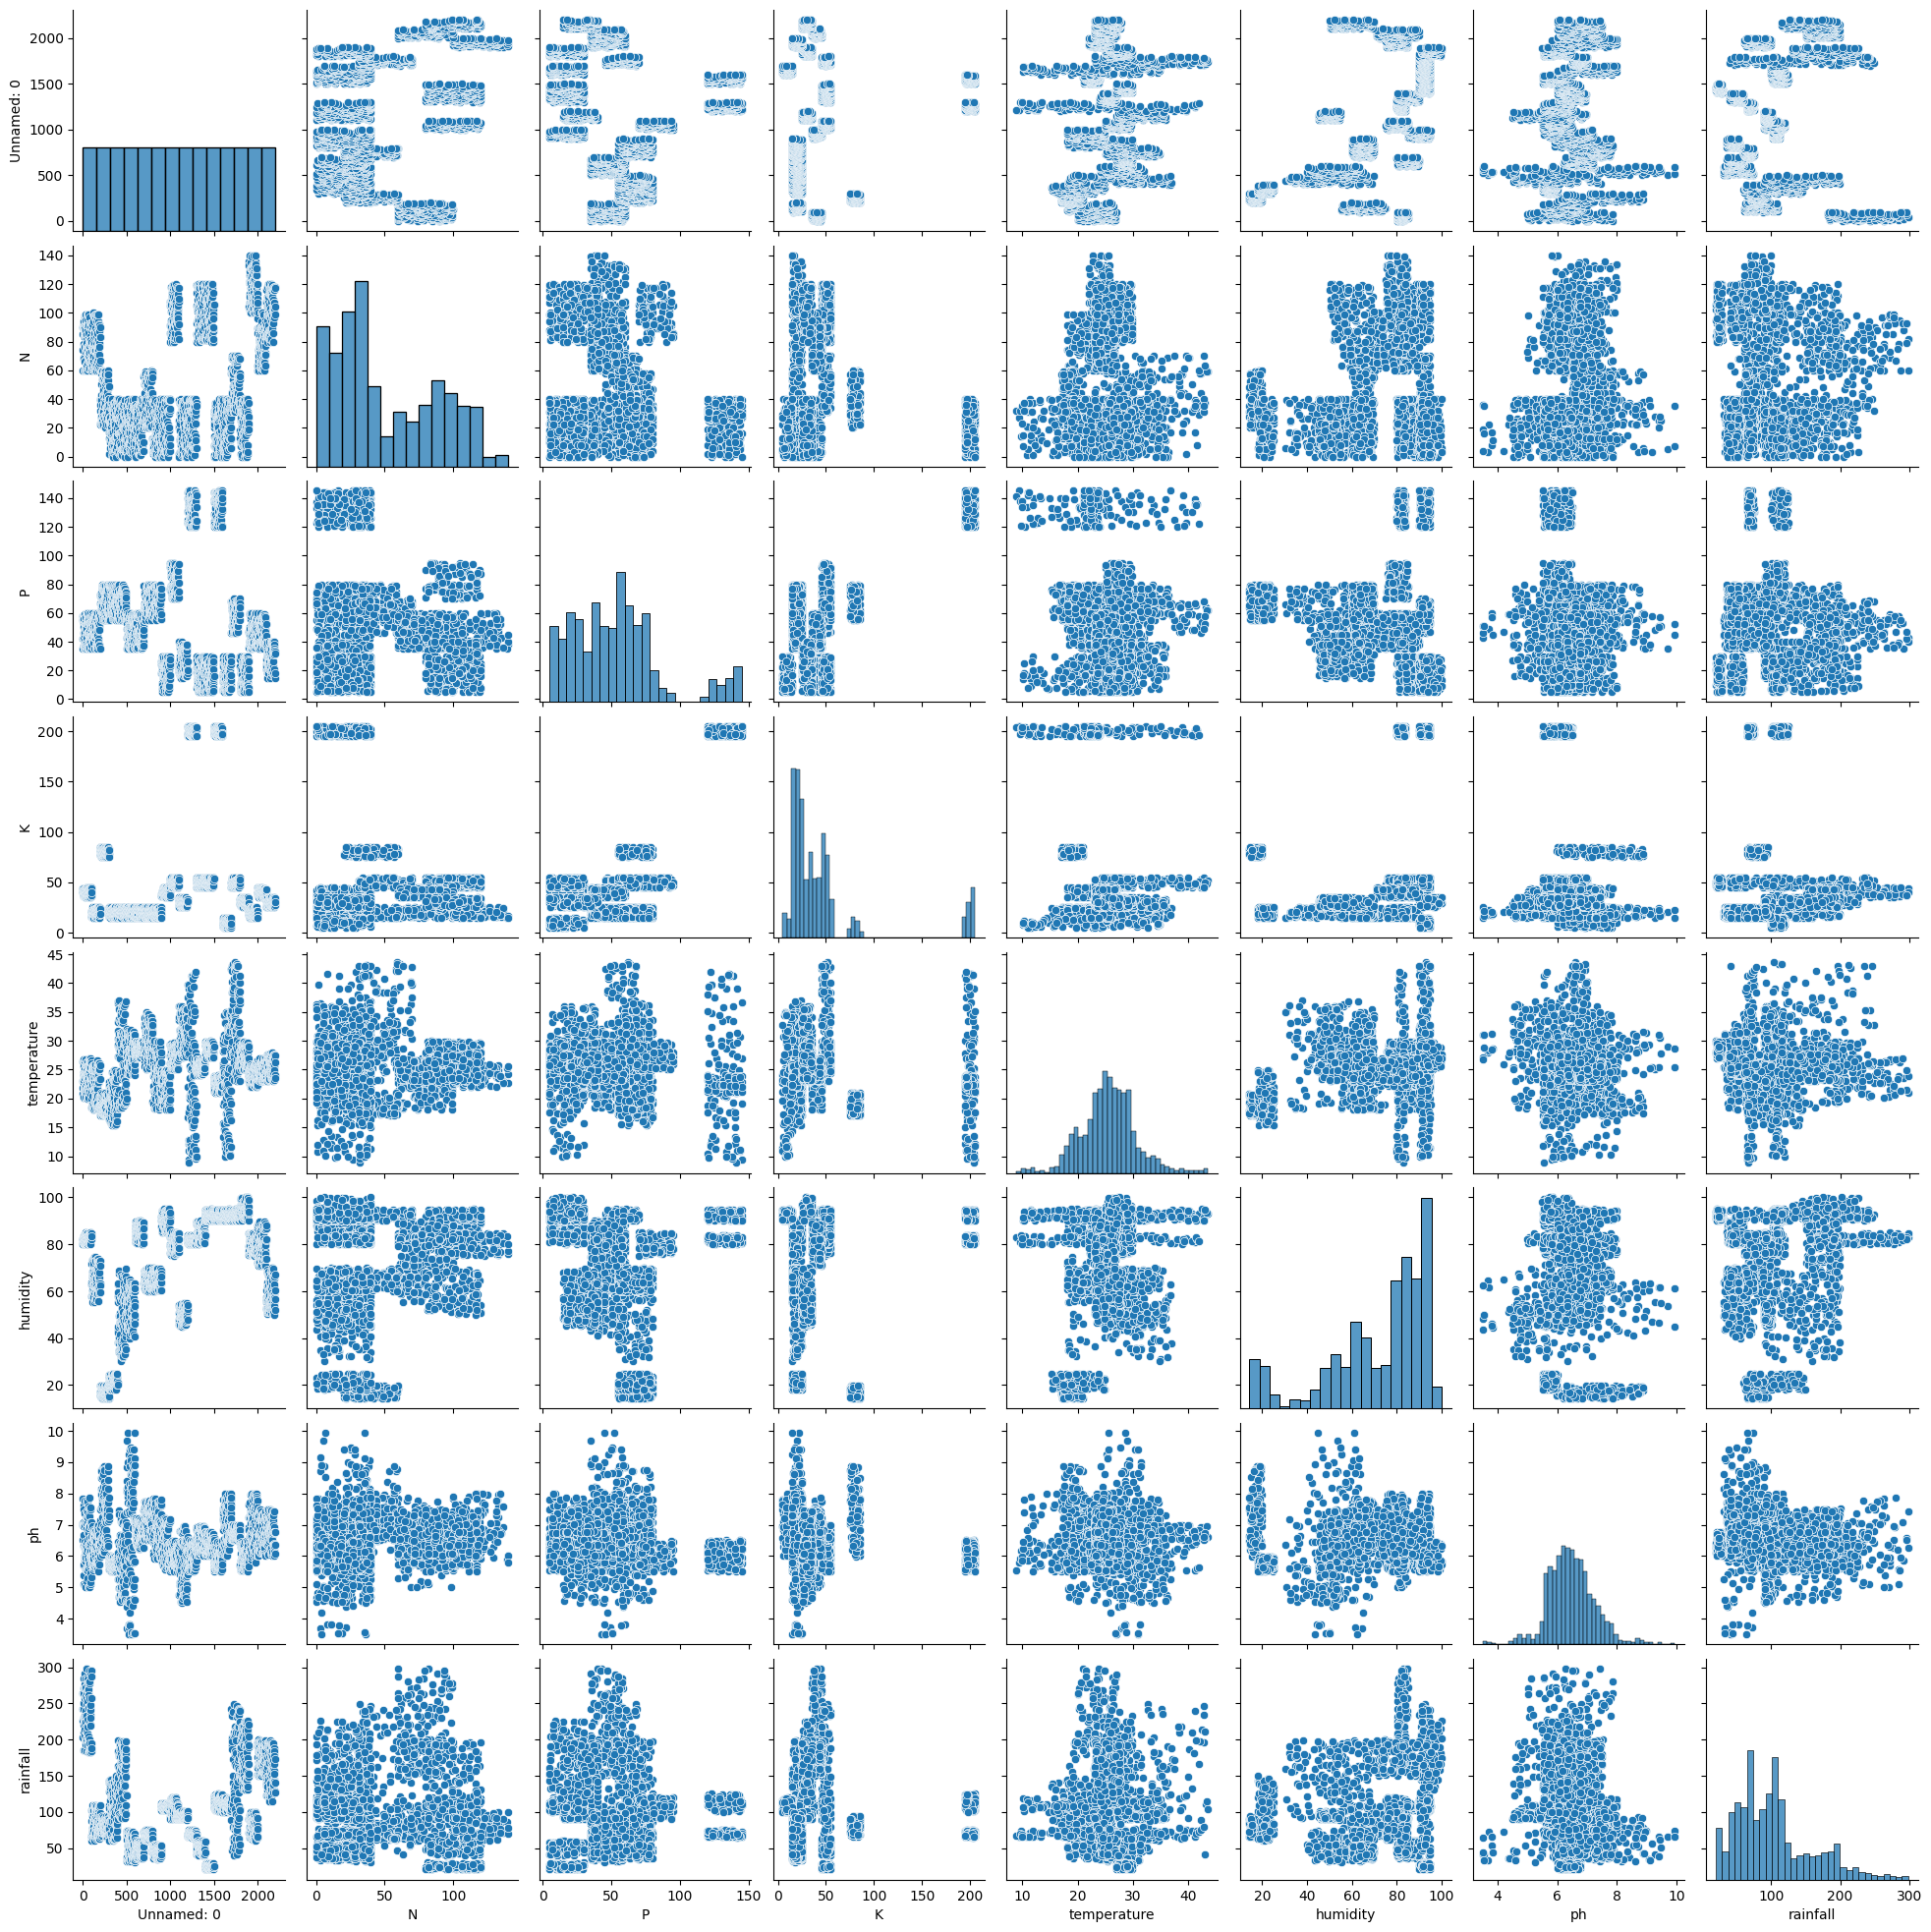

In [10]:
sns.pairplot(dataset)

In [11]:

!pip install statsmodels 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    #calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [13]:
calc_vif(dataset[["N","P","K","temperature","humidity","ph","rainfall"]])

,variables,VIF
0,N,3.144079
1,P,9.068963
2,K,5.324539
3,temperature,23.414779
4,humidity,15.070983
5,ph,26.066956
6,rainfall,4.373791


In [14]:
#vif value 0-100. so highly correlated variables temperature,humidity ,ph . so we remove these variables to reduce multicolinearity.

In [15]:
calc_vif(dataset[["N","P","K","rainfall"]])

,variables,VIF
0,N,2.203083
1,P,5.906323
2,K,4.099760
3,rainfall,3.015351


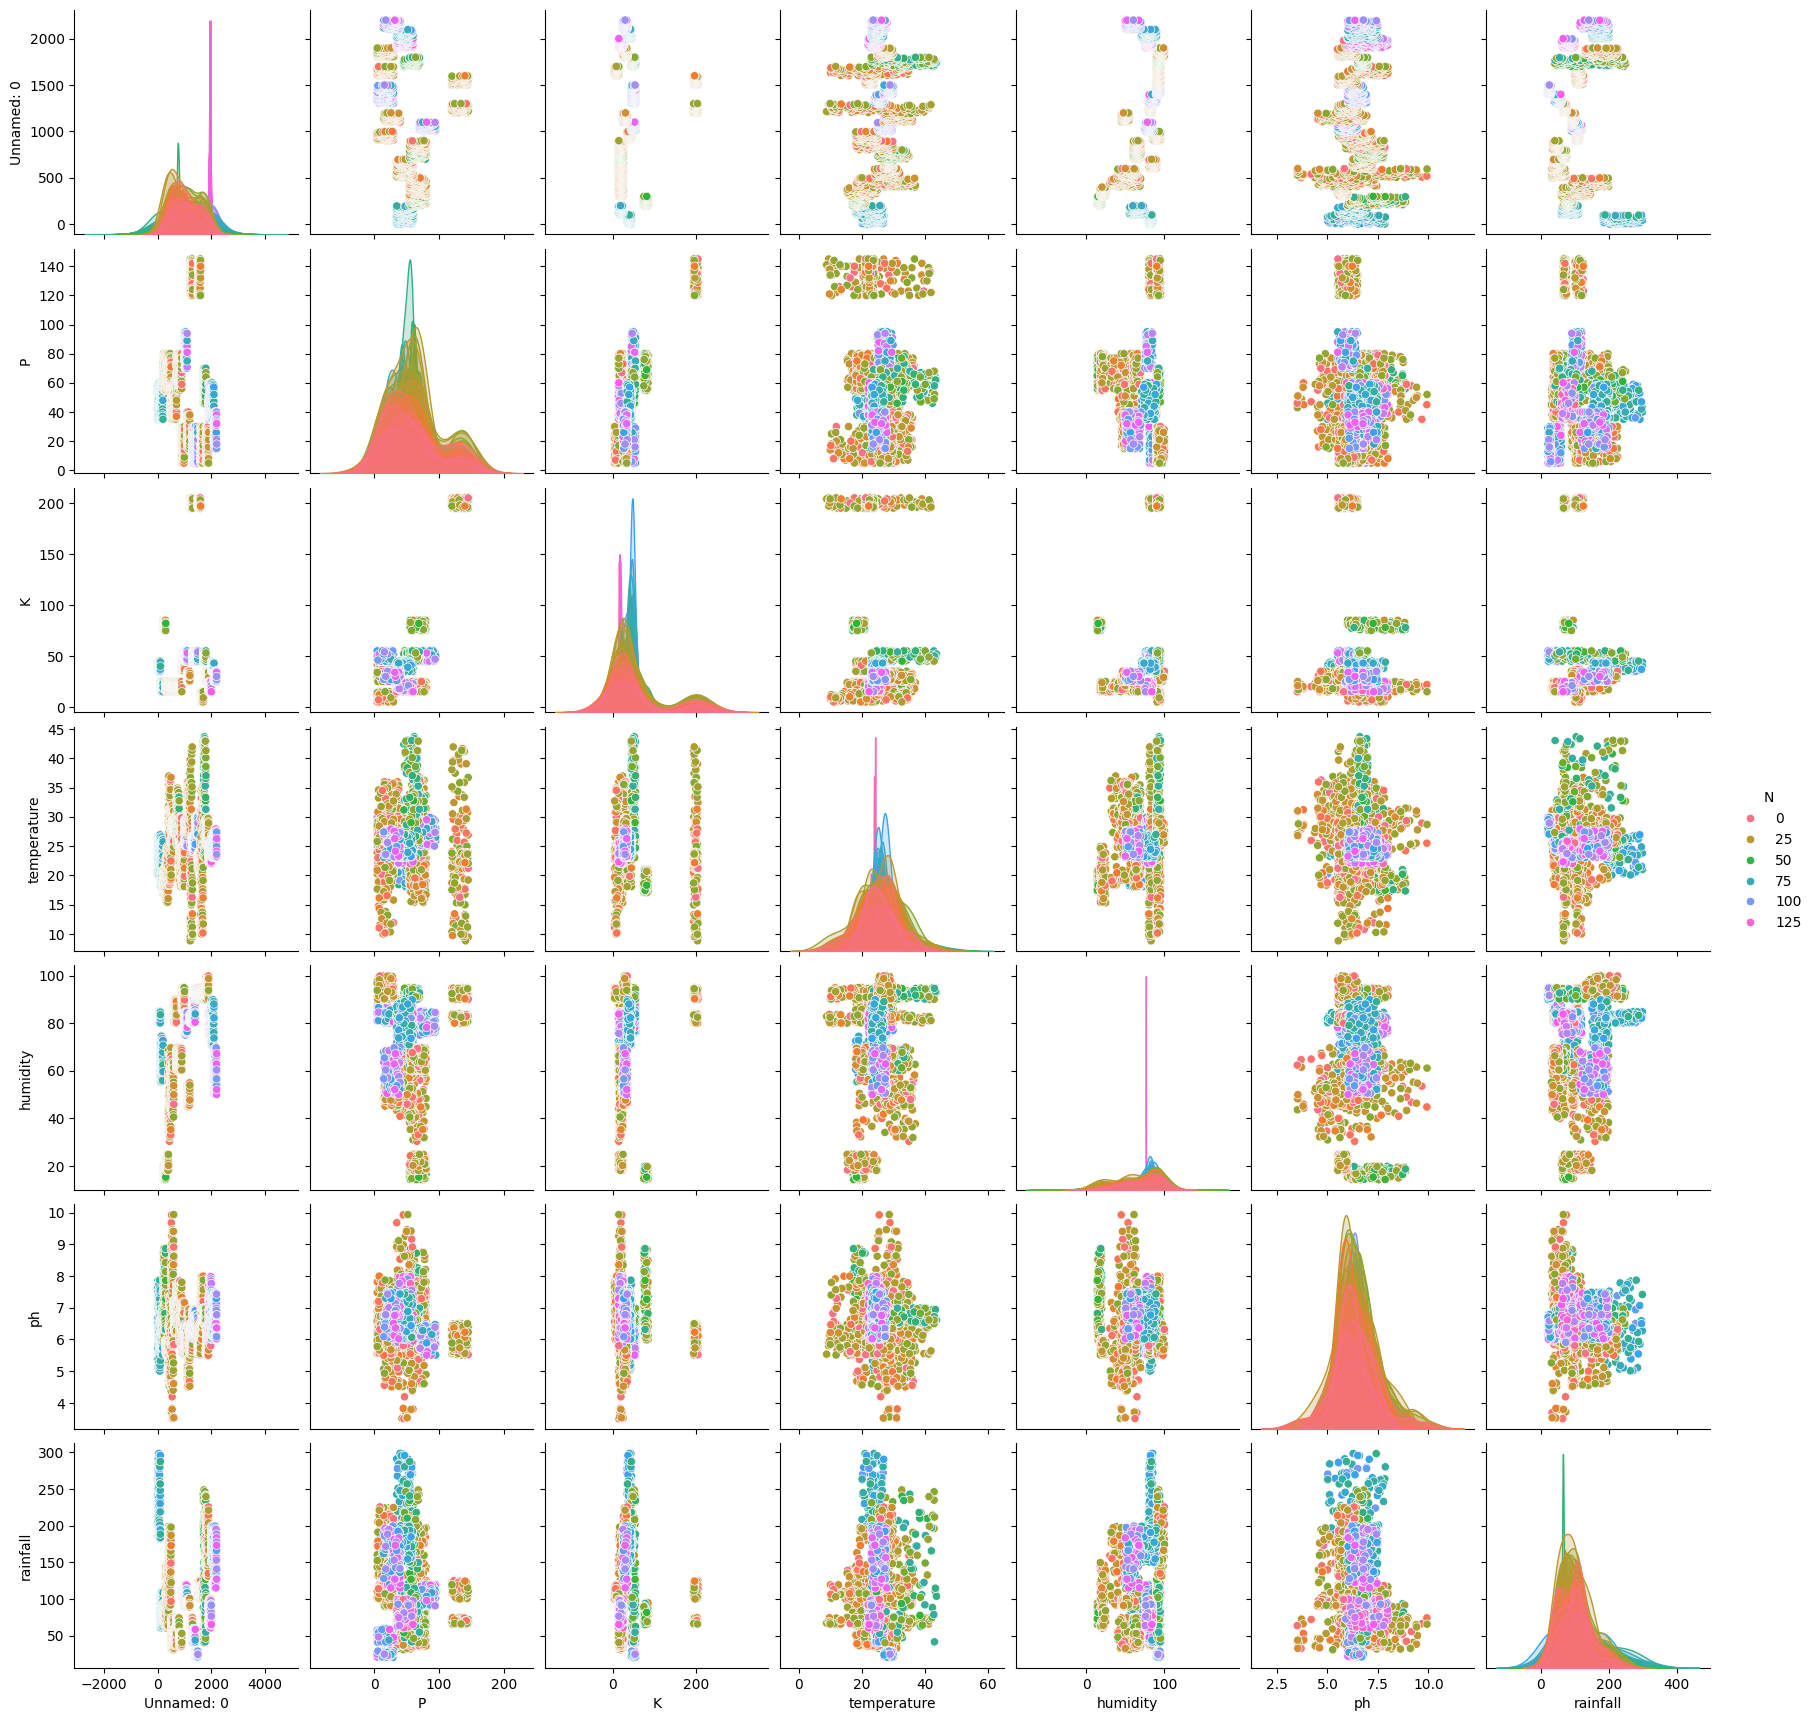

In [16]:
sns.pairplot(dataset,hue='N',diag_kind="kde",kind="scatter",palette="husl")
plt.show()            

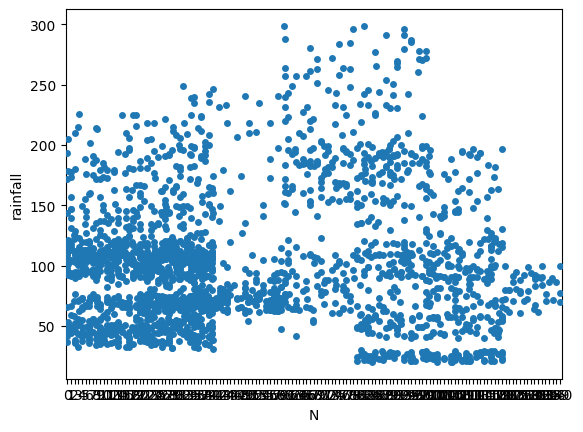

In [17]:
sns.stripplot(x='N',y='rainfall',data=dataset)
plt.show()

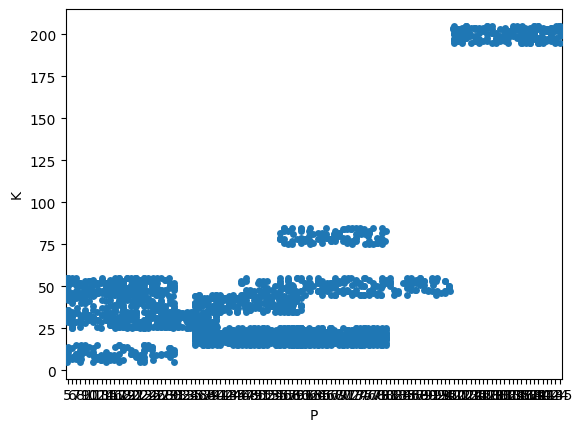

In [18]:
sns.stripplot(x='P',y='K',data=dataset)
plt.show()

C:\Users\Admin\anaconda3\envs\adml\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\adml\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\adml\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\adml\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\adml\Lib\site-packages\seaborn\cat

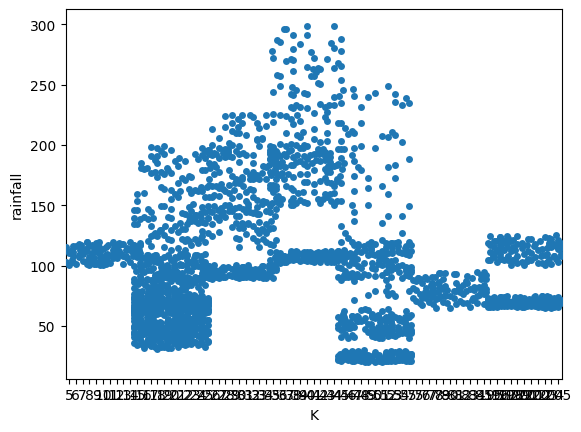

In [19]:
sns.swarmplot(x='K',y='rainfall', data=dataset)
plt.show()

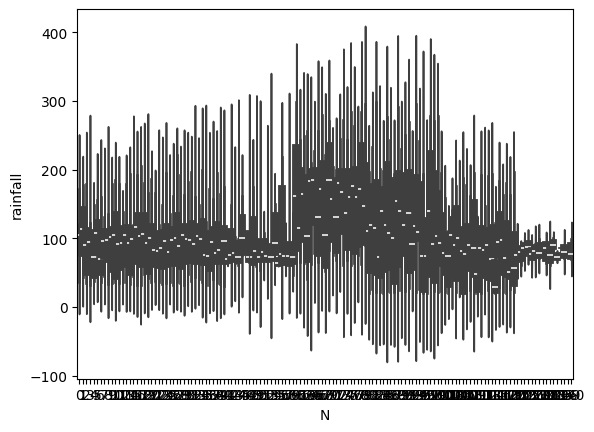

In [23]:
sns.violinplot(x='N',y='rainfall',data=dataset)
plt.show()

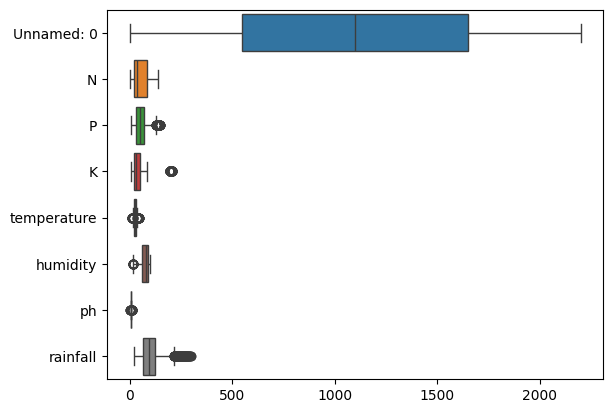

In [25]:
sns.boxplot(data=dataset,orient="h")
plt.show()            